In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Rectangular Pulse  

In [21]:
L=10
data = open("PlutoPoly/TwoDev/rx_data.txt", "r")
IQ = []

for i in data:
    I, Q = map(int, i.split(" "))
    IQ += [I + 1j*Q]
data.close()
IQ = np.array(IQ)

## Matched filter

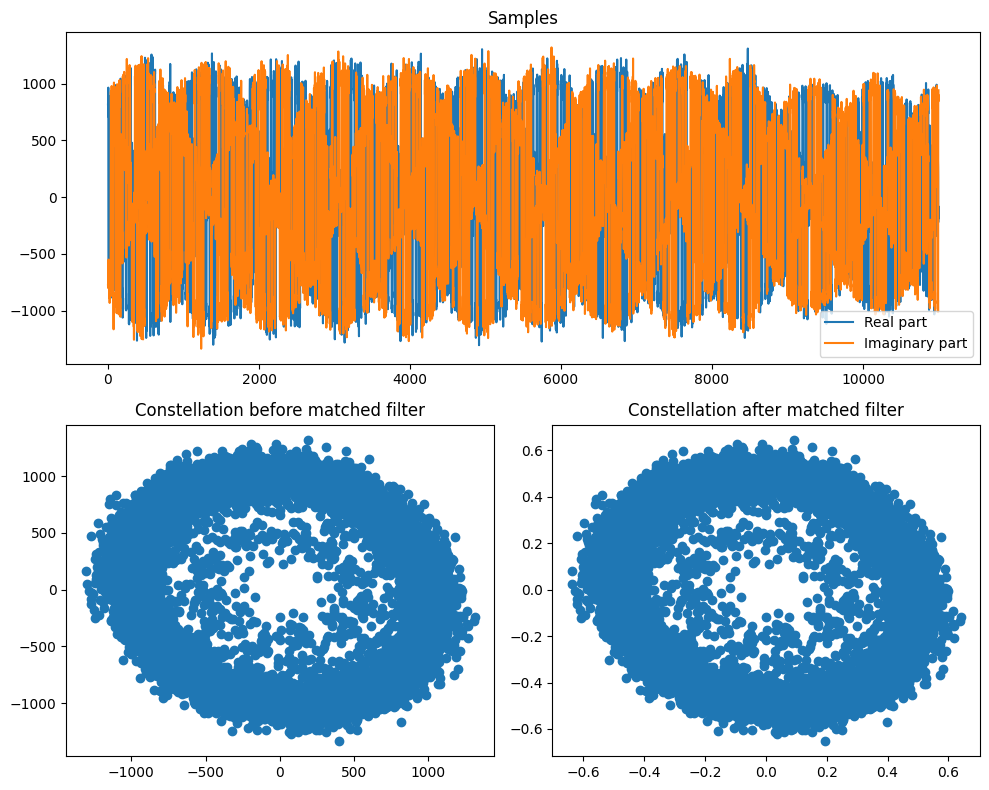

In [28]:
a, b = 0, 200000
a, b = 135000, 146000
#a,b = 116000, 127000

fig, ax = plt.subplots(2,2, figsize = (10, 8))
gs = ax[0, 0].get_gridspec()
for q in ax[0,:]:
    q.remove()
axbig = fig.add_subplot(gs[0, :])
axbig.plot(np.real(IQ)[a:b])
axbig.plot(np.imag(IQ)[a:b])
axbig.set_title("Samples")
axbig.legend(["Real part", "Imaginary part"])

ax[1,0].scatter(np.real(IQ)[a:b], np.imag(IQ)[a:b])
ax[1,0].set_title("Constellation before matched filter")

IQ_norm = IQ[a:b]/ (2**11)
IQ_matched = np.convolve(IQ_norm, np.ones(L))
#IQ_matched = IQ_matched[:-(L-1)]
IQ_matched = IQ_norm
ax[1,1].scatter(np.real(IQ_matched), np.imag(IQ_matched))
ax[1,1].set_title("Constellation after matched filter")
fig.tight_layout()

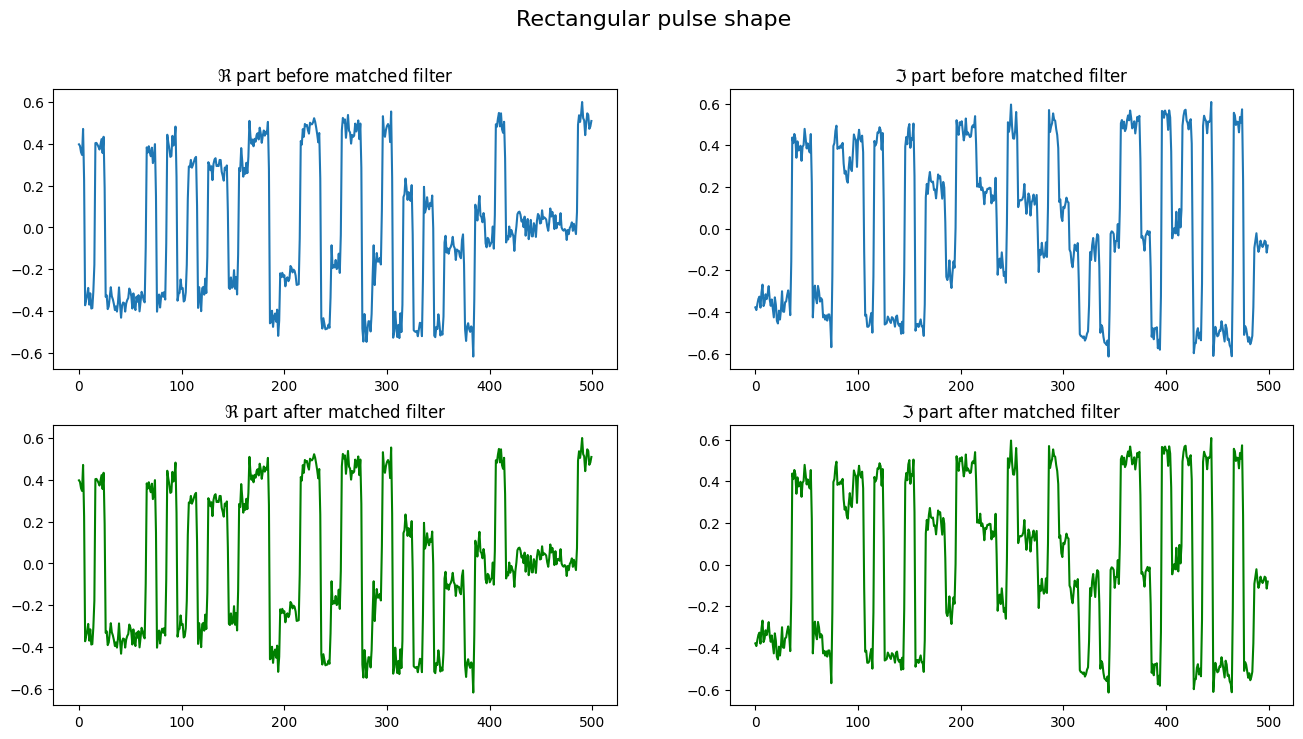

In [29]:
fig, ax = plt.subplots(2, 2, figsize = (16, 8))



ax[0][0].plot(IQ_norm.real[0:500])
ax[0][0].set_title(r"$\Re$ part before matched filter")

ax[0][1].plot(IQ_norm.imag[0:500])
ax[0][1].set_title(r"$\Im$ part before matched filter")

ax[1][0].plot(IQ_matched.real[0:500], "g")
ax[1][0].set_title(r"$\Re$ part after matched filter")

ax[1][1].plot(IQ_matched.imag[0:500], "g")
ax[1][1].set_title(r"$\Im$ part after matched filter")

fig.suptitle("Rectangular pulse shape", fontsize=16);



## Coarse freq sync

-11364.669515410438

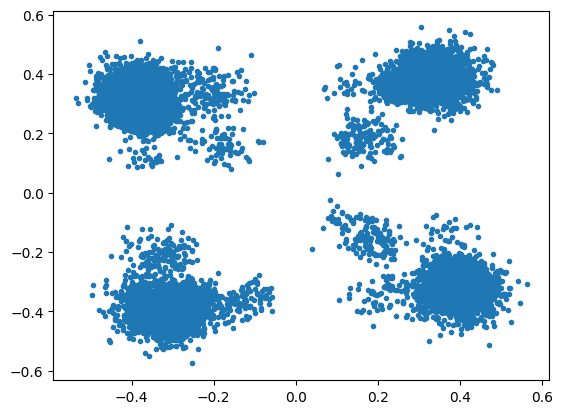

In [30]:
ftrans = np.fft.fftshift(np.fft.fft(IQ_matched**4))
fs = 10e6
xi = np.linspace(-fs/2, fs/2, len(ftrans))
f0_max = xi[np.argmax(ftrans)]
#plt.plot(xi, np.abs(ftrans))
#plt.plot(f0_max, np.abs(np.max(ftrans)), ".")

Ts = 1/fs
t = np.arange(0, Ts*len(IQ_matched), Ts) # create time vector
IQ_coarse = IQ_matched * np.exp(-1j*2*np.pi*f0_max*t/4.0)
plt.plot(IQ_coarse.real, IQ_coarse.imag, ".");
f0_max

## Time Sync

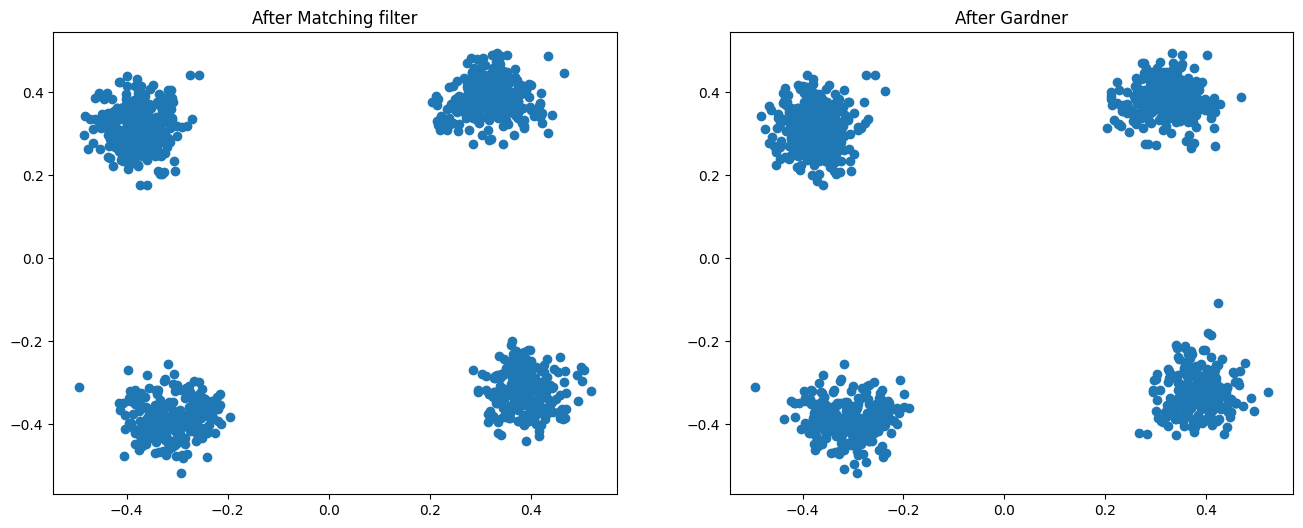

In [33]:
p1, p2 =  0, 0
BnTs = 0.01
Nsps = 10
Kp = 0.165

zeta = np.sqrt(2)/2

theta = (BnTs/Nsps)/(zeta+(0.25/zeta))
K1 = -4*zeta*theta / ((1+2*zeta*theta+ theta**2)*Kp)
K2 = -4*theta**2 / ((1+2*zeta*theta+ theta**2)*Kp)
tau = 0


I = IQ_coarse.real
Q = IQ_coarse.imag
erof = []
part = []
errors = []
offset = []

for i in range(0, len(I) - Nsps, Nsps):
    err = (I[i + Nsps + tau] - I[i + tau]) * I[i + (Nsps//2) + tau] + \
          (Q[i + Nsps + tau] - Q[i + tau]) * Q[i + (Nsps//2) + tau]

    p1 = err*K1
    p2 += p1+err*K2
    
    
    while (p2>1): p2-=1
    while (p2<-1): p2+=1
    tau = int(np.round(p2*Nsps))
    
    offset.append(tau)
    part.append(p2)
    errors.append(err)
        
    erof.append(i+Nsps+tau)
        
  

IQ_norm_matched_sync = [IQ_coarse[i] for i in erof]
fig, ax = plt.subplots(1,2, figsize=(16,6))
start = 1
ax[0].scatter(IQ_coarse.real[start::10], IQ_coarse.imag[start::10])
ax[0].set_title("After Matching filter")

ax[1].scatter(np.real(IQ_norm_matched_sync), np.imag(IQ_norm_matched_sync))
ax[1].set_title("After Gardner");


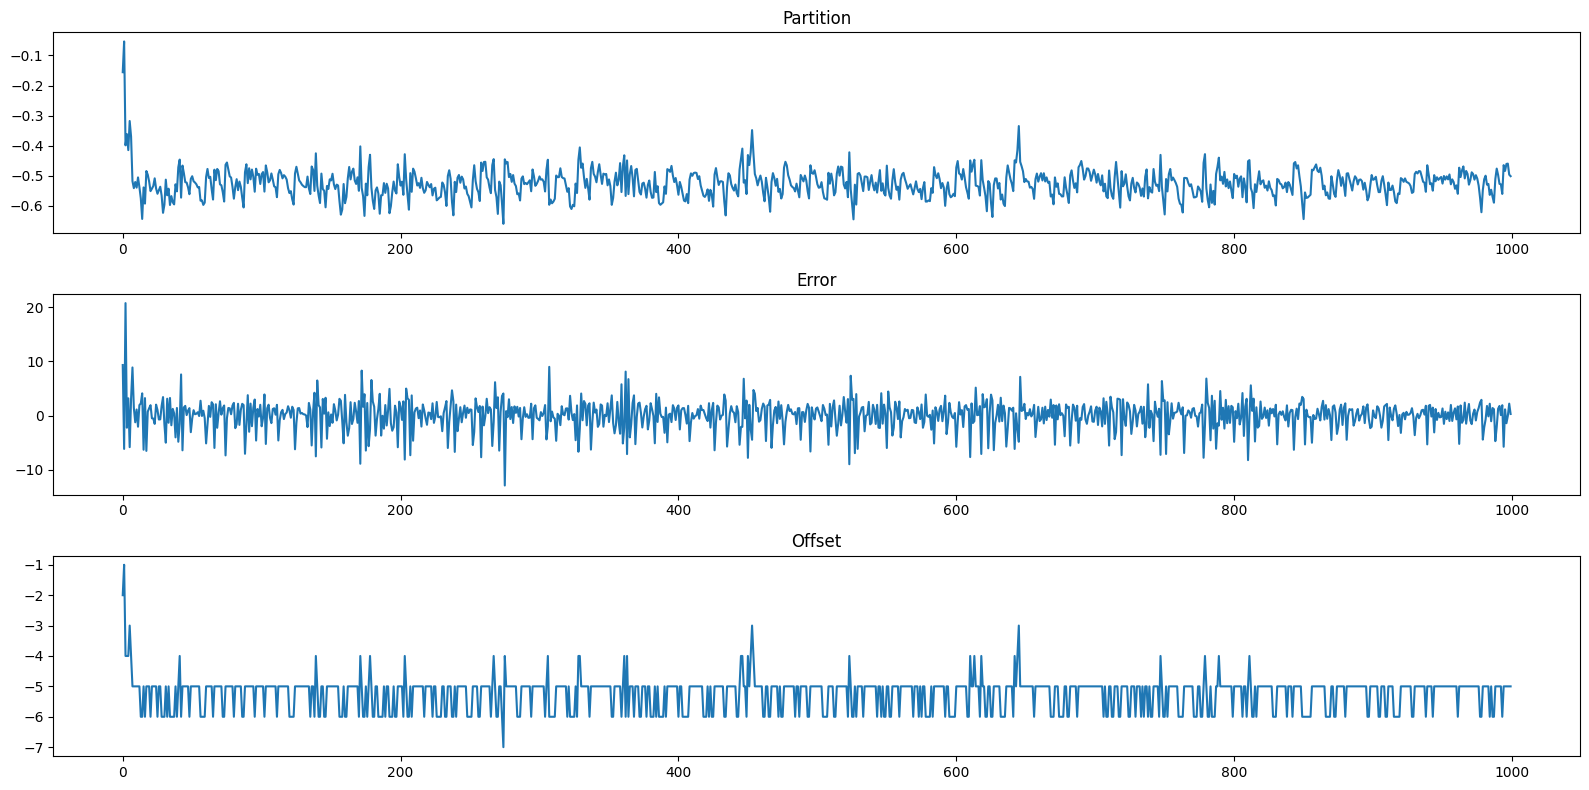

In [166]:
fig, ax = plt.subplots(3, 1, figsize=(16,8))

ax[0].plot(part)
ax[0].set_title("Partition")

ax[1].plot(errors)
ax[1].set_title("Error")

ax[2].plot(offset)
ax[2].set_title("Offset")

fig.tight_layout()

Text(0.5, 1.0, '$\\Im$-part After Gardner')

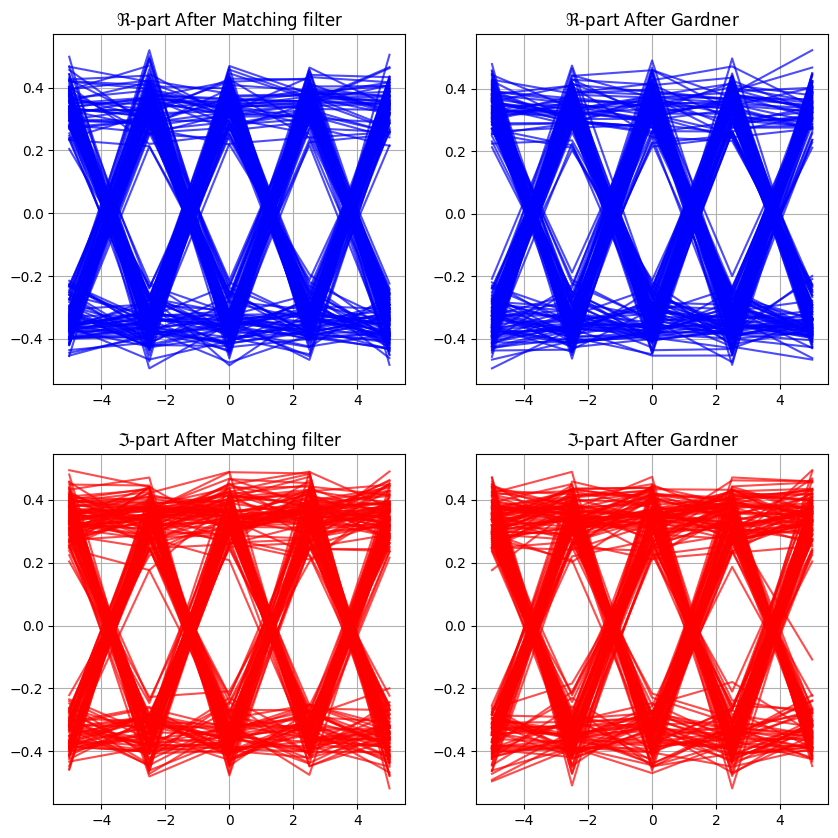

In [34]:
import numpy as np
import matplotlib.pyplot as plt

signal1=IQ_coarse.real[start::10]
fig, ax = plt.subplots(2, 2, figsize=(10,10))
for i in range(0, len(signal1)-(Nsps//2), Nsps//2):
    segment = signal1[i: i+(Nsps//2)]
    time = np.linspace(-(Nsps//2), Nsps//2, Nsps//2)
    ax[0][0].plot(time, segment, alpha=0.7, color='blue')

signal2 = np.real(IQ_norm_matched_sync)
for i in range(0, len(signal2)-(Nsps//2), Nsps//2):
    segment = signal2[i: i+(Nsps//2)]
    time = np.linspace(-(Nsps//2), Nsps//2, Nsps//2)
    ax[0][1].plot(time, segment, alpha=0.7, color='blue')



signal3 = IQ_coarse.imag[start::10]
for i in range(0, len(signal3)-(Nsps//2), Nsps//2):
    segment = signal3[i: i+(Nsps//2)]
    time = np.linspace(-(Nsps//2), Nsps//2, Nsps//2)
    ax[1][0].plot(time, segment, alpha=0.7, color='red')



signal4 = np.imag(IQ_norm_matched_sync)
for i in range(0, len(signal3)-(Nsps//2), Nsps//2):
    segment = signal4[i: i+(Nsps//2)]
    time = np.linspace(-(Nsps//2), Nsps//2, Nsps//2)
    ax[1][1].plot(time, segment, alpha=0.7, color='red')




for i in ax:
    for j in i:
        j.grid()


ax[0][0].set_title(r"$\Re$-part After Matching filter")
ax[0][1].set_title(r"$\Re$-part After Gardner")

ax[1][0].set_title(r"$\Im$-part After Matching filter")
ax[1][1].set_title(r"$\Im$-part After Gardner")



###### fig, ax = plt.subplots(3, 1, figsize=(16,8))

ax[0].plot(part)
ax[0].set_title("Partition")

ax[1].plot(errors)
ax[1].set_title("Error")

ax[2].plot(offset)
ax[2].set_title("Offset")

fig.tight_layout()

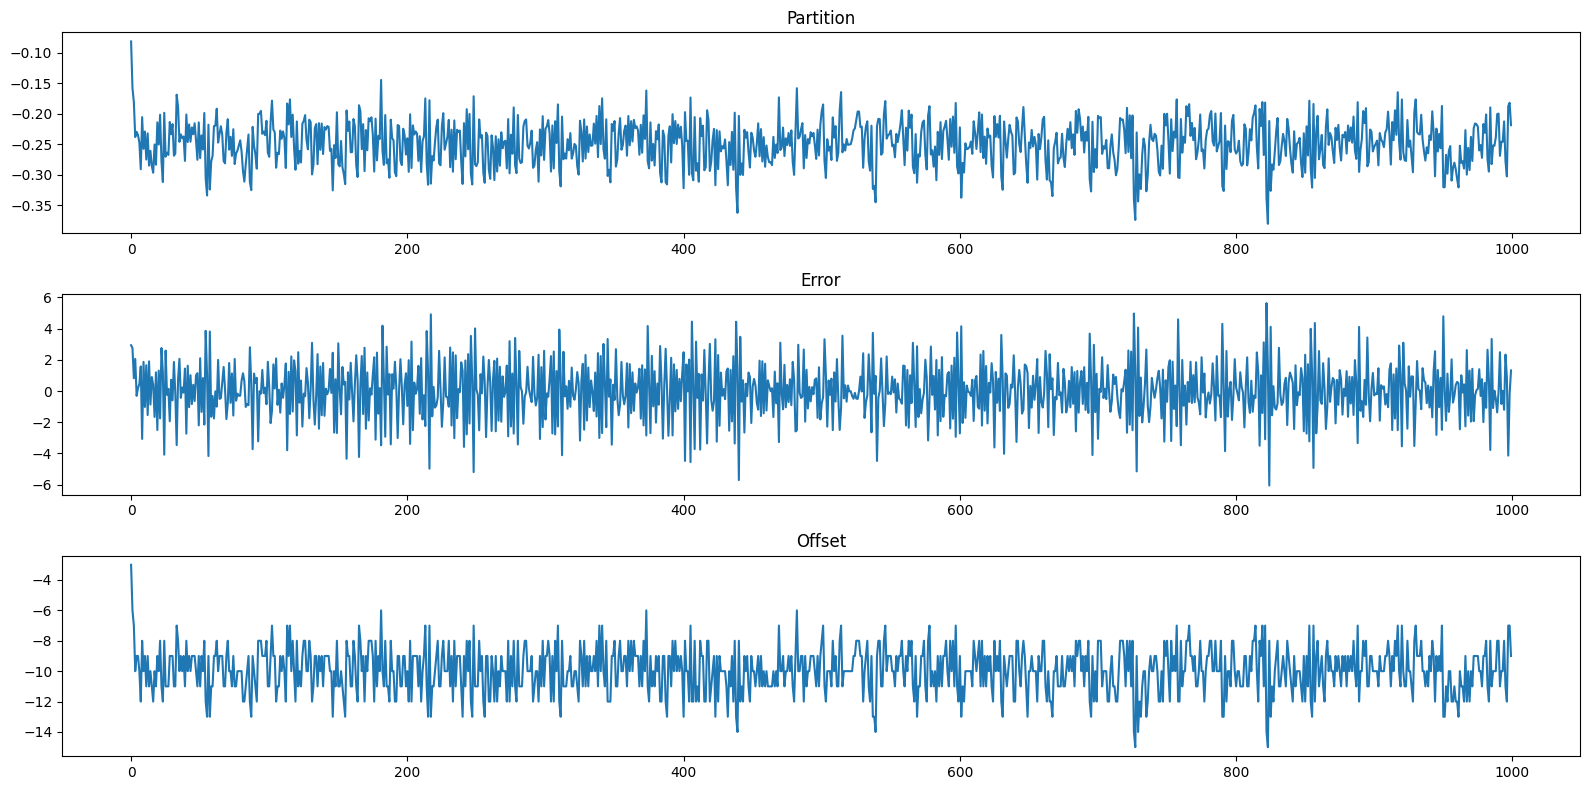

In [307]:
fig, ax = plt.subplots(3, 1, figsize=(16,8))

ax[0].plot(part)
ax[0].set_title("Partition")

ax[1].plot(errors)
ax[1].set_title("Error")

ax[2].plot(offset)
ax[2].set_title("Offset")

fig.tight_layout()

# L = 2

In [15]:
data1 = open("PlutoPoly/rx_data.txt", "r")
IQ1 = []

for i in data1:
    I1, Q1 = map(int, i.split(" "))
    IQ1 += [I1 + 1j*Q1]


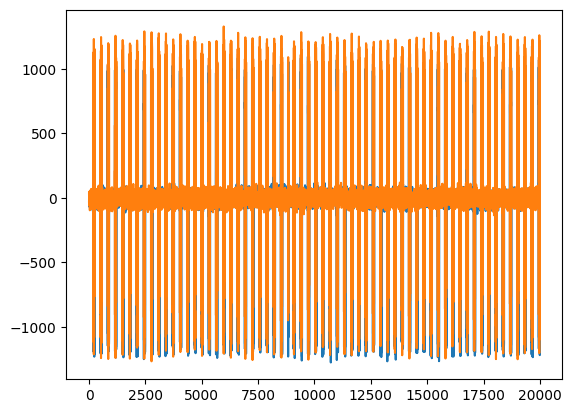

In [16]:
a, b = 0, 200000
a, b = 155000, 175000

plt.plot(np.real(IQ1)[a:b])
plt.plot(np.imag(IQ1)[a:b])



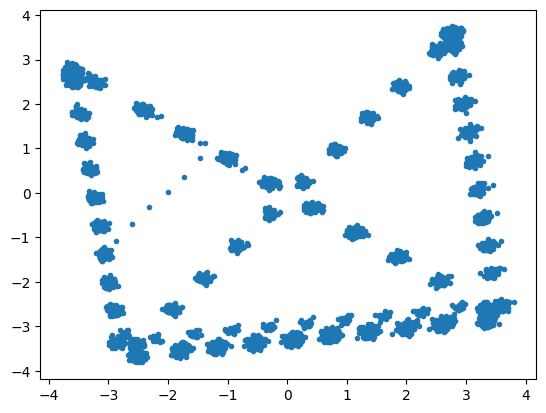

In [17]:
IQ_norm1 = np.array(IQ1[a:b])/ (2**11)
IQ_norm_matched1 = np.convolve(IQ_norm, np.ones(2))
plt.plot(IQ_norm_matched.real, IQ_norm_matched.imag, ".")

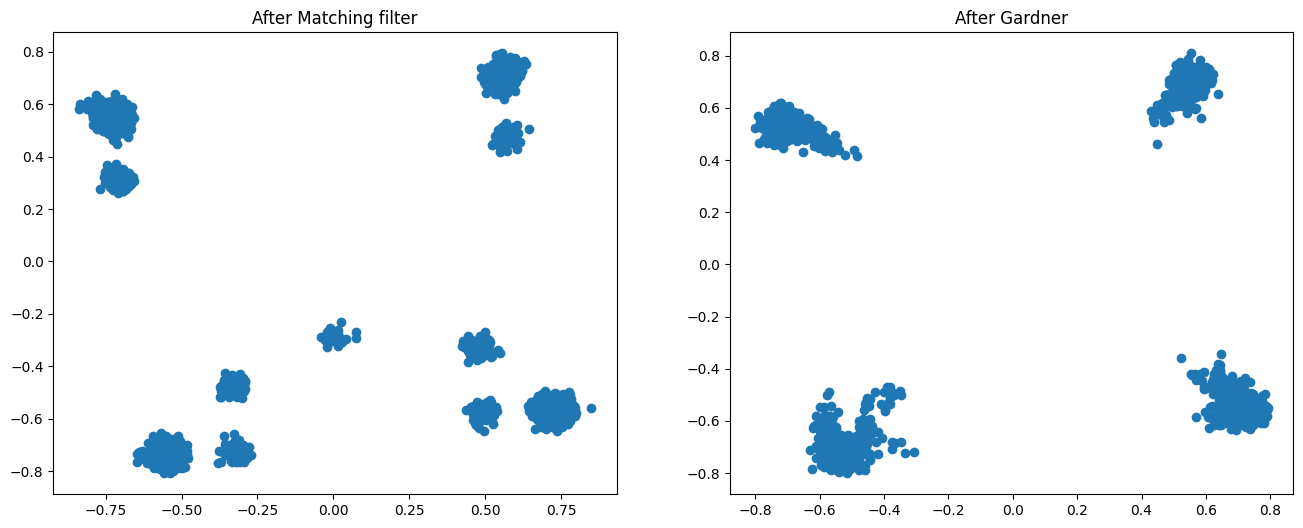

In [22]:
import scipy.interpolate as p
x = np.arange(0, len(IQ_norm_matched1.real))
y1 = IQ_norm_matched1.real
y2 = IQ_norm_matched1.imag

z1 = p.CubicSpline(x, y1)
z2 = p.CubicSpline(x, y2)
step = 0.125
a = np.arange(0, len(IQ_norm_matched1.real), step)
b = np.arange(0, len(IQ_norm_matched1.imag), step)

IQ_norm_matched_inter = z1(a) + 1j*z2(b)




K1, K2, p1, p2 = 0.1, 0.2, 0, 0
BnTs = 0.1/16
Nsps = 16
Kp = 0.002
zeta = np.sqrt(2)/2



theta = (BnTs/Nsps)/(zeta+(0.25/zeta))
K1 = -4*zeta*theta / ((1+2*zeta*theta+ theta**2)*Kp)
K2 = -4*theta**2 / ((1+2*zeta*theta+ theta**2)*Kp)
tau = 0


I = IQ_norm_matched_inter.real
Q = IQ_norm_matched_inter.imag
erof = []
part = []
errors = []
offset = []

for i in range(0, len(I) - Nsps, Nsps):
    err = (I[i + Nsps + tau] - I[i + tau]) * I[i + (Nsps//2) + tau] + \
          (Q[i + Nsps + tau] - Q[i + tau]) * Q[i + (Nsps//2) + tau]

    p1 = err*K1
    p2 += p1+err*K2
    
    
    while (p2>1): p2-=1
    while (p2<-1): p2+=1
    tau = int(np.round(p2*Nsps))
    
    offset.append(tau)
    part.append(p2)
    errors.append(err)
        
    erof.append(i+Nsps+tau)
        
   
        




# interactive_plot = interactive(gardner, Kp=(1, 100, 10), zeta=(0.1, 1, 0.1), start = (0, 9, 1))
# output = interactive_plot.children[-1]

# interactive_plot

IQ_norm_matched_sync1 = [IQ_norm_matched_inter[i] for i in erof]
fig, ax = plt.subplots(1,2, figsize=(16,6))
start = 1
ax[0].scatter(IQ_norm_matched1.real[start::2], IQ_norm_matched1.imag[start::2])
ax[0].set_title("After Matching filter")

ax[1].scatter(np.real(IQ_norm_matched_sync1), np.imag(IQ_norm_matched_sync1))
ax[1].set_title("After Gardner");


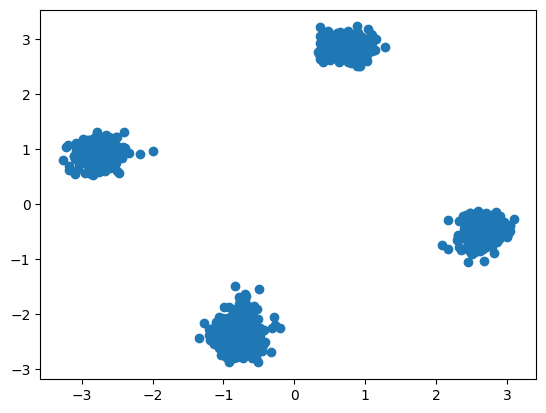

In [306]:
import scipy.interpolate as p
x = np.arange(0, len(IQ_norm_matched.real))
y1 = IQ_norm_matched.real
y2 = IQ_norm_matched.imag

z1 = p.CubicSpline(x, y1)
z2 = p.CubicSpline(x, y2)
step = 0.25
a = np.arange(0, len(IQ_norm_matched.real), step)
b = np.arange(0, len(IQ_norm_matched.imag), step)

IQ_interpolated = z1(a) + 1j*z2(b)

p1, p2 =  0, 0

BnTs = 0.1/40
Nsps = 40
Kp = 0.006
zeta = np.sqrt(2)/2

theta = (BnTs/Nsps)/(zeta+(0.25/zeta))
K1 = -4*zeta*theta / ((1+2*zeta*theta+ theta**2)*Kp)
K2 = -4*theta**2 / ((1+2*zeta*theta+ theta**2)*Kp)
tau = 0


I = np.real(IQ_interpolated)
Q = np.imag(IQ_interpolated)
erof = []
part = []
errors = []
offset = []


for i in range(0, len(I) - Nsps, Nsps):
    err = (I[i + Nsps + tau] - I[i + tau]) * I[i + (Nsps//2) + tau] + \
          (Q[i + Nsps + tau] - Q[i + tau]) * Q[i + (Nsps//2) + tau]

    p1 = err*K1
    p2 += p1+err*K2
    
    
    while (p2>1): p2-=1
    while (p2<-1): p2+=1
    tau = int(np.round(p2*Nsps))

    offset.append(tau)
    part.append(p2)
    errors.append(err)
        

        
    erof.append(i+Nsps+tau)

IQ_interpolated_s = [IQ_interpolated[i] for i in erof]

plt.scatter(np.real(IQ_interpolated_s),np.imag(IQ_interpolated_s))
